# Traffic Accident Severity - Exploratory Data Analysis (EDA)
**By:** Collision Clankers

**Team Members:** Ryan Pham, Eric Hoang, Harry Cao, Jericho Gutlay, Johnny Tran

**Dataset:** US_Accidents_March23.csv (Kaggle)  

**Objective:** Analyze patterns and relationships between accident severity and factors like weather, road type, time, visibility, traffic density, and location.

---

## Stage 1: EDA - "What do we have?"

### 1. Import Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

### 2. Load Dataset

In [34]:
df = pd.read_csv('data/US_Accidents_March23.csv')
print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")

Dataset loaded successfully!
Shape: (7728394, 46)


---
## Structure & Quality

### 3. Size & Schema: Rows, Columns, Data Types

In [35]:
print(f"Number of Rows: {df.shape[0]:,}")
print(f"Number of Columns: {df.shape[1]}")
print(f"\nFirst few rows:")
df.head()

Number of Rows: 7,728,394
Number of Columns: 46

First few rows:


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [36]:
print("Data Types:")
print(df.dtypes)
print(f"\n{df.info()}")

Data Types:
ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     boo

### 4. Data Dictionary - Key Variables for This Project

In [37]:
# Select relevant columns for our analysis
relevant_cols = ['Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 
                 'Distance(mi)', 'Temperature(F)', 'Humidity(%)', 
                 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
                 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight',
                 'Street', 'City', 'State', 'Timezone', 'Country',
                 'Amenity', 'Bump', 'Crossing', 'Junction', 'Railway', 
                 'Station', 'Stop', 'Traffic_Signal']

# Check which columns exist
existing_cols = [col for col in relevant_cols if col in df.columns]
print(f"Using {len(existing_cols)} existing columns out of {len(relevant_cols)} relevant columns")
print("\nColumn names and descriptions:")

data_dict = {
    'Severity': 'Target variable - Accident severity (1-4 scale)',
    'Start_Time': 'Timestamp when accident occurred',
    'Start_Lat/Start_Lng': 'GPS coordinates of accident location',
    'Distance(mi)': 'Length of road affected by accident',
    'Temperature(F)': 'Temperature in Fahrenheit',
    'Humidity(%)': 'Humidity percentage',
    'Visibility(mi)': 'Visibility in miles',
    'Wind_Speed(mph)': 'Wind speed in mph',
    'Weather_Condition': 'Categorical weather description',
    'Sunrise_Sunset': 'Day or Night',
    'Civil_Twilight': 'Light conditions',
    'Street/City/State': 'Location information',
    'Traffic_Signal': 'Traffic control presence (boolean)',
    'Junction/Crossing': 'Road features (boolean)'
}

for col, desc in data_dict.items():
    print(f"    - {col}: {desc}")

Using 26 existing columns out of 26 relevant columns

Column names and descriptions:
    - Severity: Target variable - Accident severity (1-4 scale)
    - Start_Time: Timestamp when accident occurred
    - Start_Lat/Start_Lng: GPS coordinates of accident location
    - Distance(mi): Length of road affected by accident
    - Temperature(F): Temperature in Fahrenheit
    - Humidity(%): Humidity percentage
    - Visibility(mi): Visibility in miles
    - Wind_Speed(mph): Wind speed in mph
    - Weather_Condition: Categorical weather description
    - Sunrise_Sunset: Day or Night
    - Civil_Twilight: Light conditions
    - Street/City/State: Location information
    - Traffic_Signal: Traffic control presence (boolean)
    - Junction/Crossing: Road features (boolean)


### 5. Missingness Analysis

In [38]:
# Calculate missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percent': (df.isnull().sum() / len(df)) * 100
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percent', ascending=False)

print(f"Columns with missing values: {len(missing_data)}/{len(df.columns)}")
print(f"\nTop 20 columns by missingness:")
missing_data.head(20)

Columns with missing values: 22/46

Top 20 columns by missingness:


,Column,Missing_Count,Missing_Percent
End_Lat,End_Lat,3402762,44.029355
End_Lng,End_Lng,3402762,44.029355
Precipitation(in),Precipitation(in),2203586,28.512858
Wind_Chill(F),Wind_Chill(F),1999019,25.865904
Wind_Speed(mph),Wind_Speed(mph),571233,7.391355
Visibility(mi),Visibility(mi),177098,2.291524
Wind_Direction,Wind_Direction,175206,2.267043
Humidity(%),Humidity(%),174144,2.253301
Weather_Condition,Weather_Condition,173459,2.244438
Temperature(F),Temperature(F),163853,2.120143


#### Visualization: Missing data heatmap for top missing columns

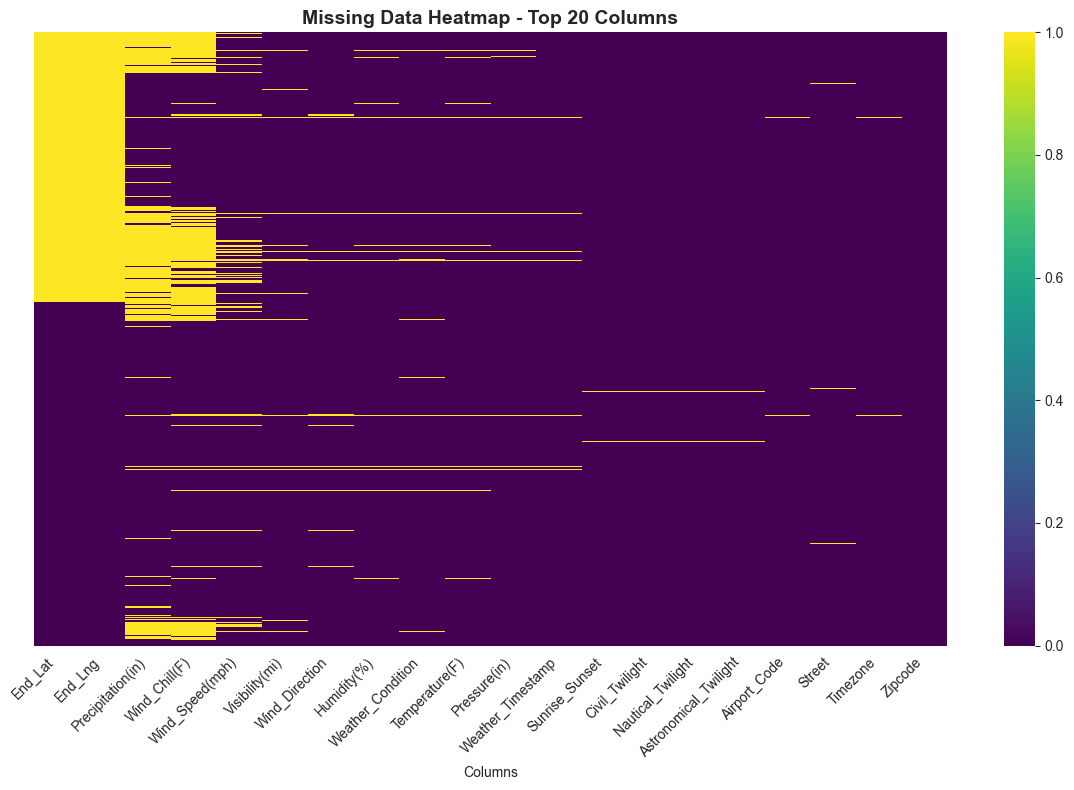

Heatmap saved to outputs/missingness_heatmap.png


In [39]:
top_missing_cols = missing_data.head(20)['Column'].tolist()

plt.figure(figsize=(12, 8))
sns.heatmap(df[top_missing_cols].isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Heatmap - Top 20 Columns', fontsize=14, fontweight='bold')
plt.xlabel('Columns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('outputs/missingness_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print("Heatmap saved to outputs/missingness_heatmap.png")

#### Visualization: Bar Chart of Missing Percentages

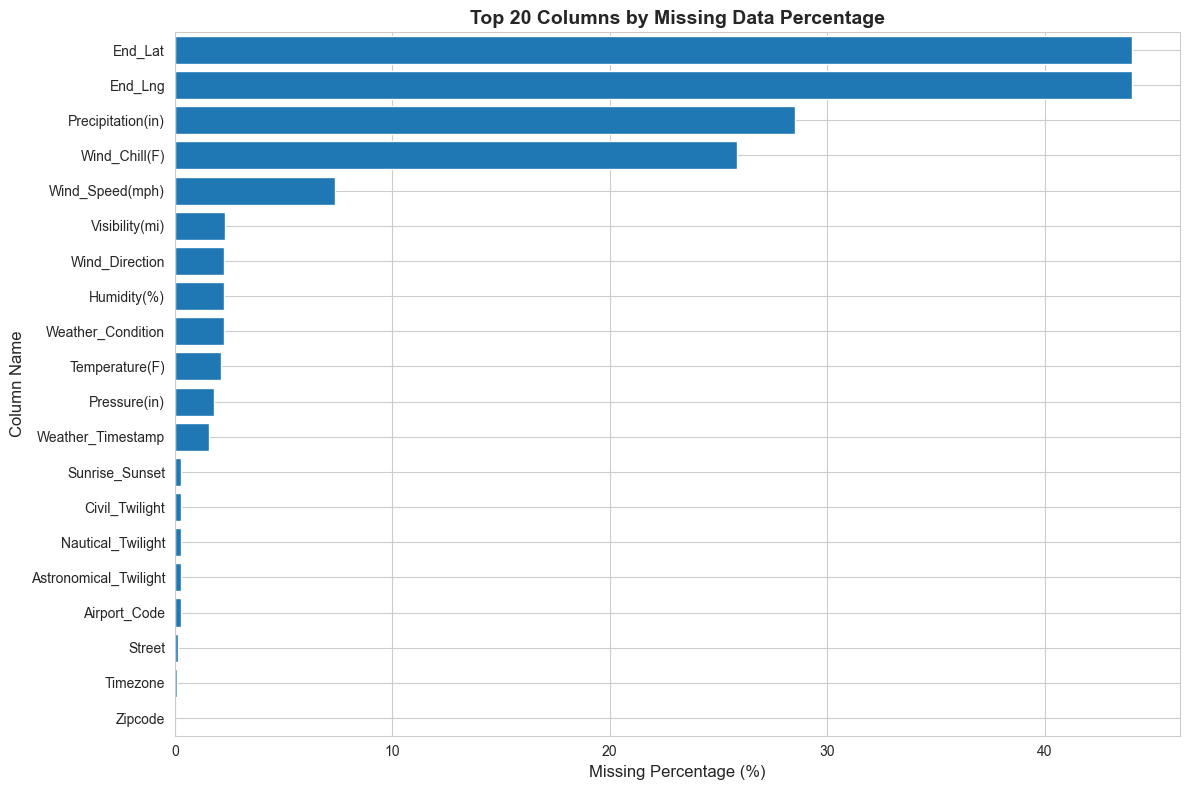

Bar chart saved to outputs/missingness_bar.png


In [40]:
plt.figure(figsize=(12, 8))
plt.barh(missing_data.head(20)['Column'], missing_data.head(20)['Missing_Percent'])
plt.xlabel('Missing Percentage (%)', fontsize=12)
plt.ylabel('Column Name', fontsize=12)
plt.title('Top 20 Columns by Missing Data Percentage', fontsize=14, fontweight='bold')
plt.gca().set_ylim(-0.5, len(missing_data.head(20)) - 0.5)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('outputs/missingness_bar.png', dpi=300, bbox_inches='tight')
plt.show()
print("Bar chart saved to outputs/missingness_bar.png")

### 6. Duplicates & Obvious Errors

In [41]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates:,} ({(duplicates/len(df)*100):.2f}%)")

# Check Severity range (should be 1-4)
if 'Severity' in df.columns:
    print(f"\nSeverity value range: {df['Severity'].min()} to {df['Severity'].max()}")
    print(f"Unique severity values: {sorted(df['Severity'].dropna().unique())}")
    
# Check for negative values in numeric columns that shouldn't be negative
numeric_cols = ['Temperature(F)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Distance(mi)']
existing_numeric = [col for col in numeric_cols if col in df.columns]

print("\nChecking for negative values in key numeric columns:")
for col in existing_numeric:
    neg_count = (df[col] < 0).sum()
    if neg_count > 0:
        print(f"    - {col}: {neg_count} negative values")
    else:
        print(f"    - {col}: No negative values")

Number of duplicate rows: 0 (0.00%)

Severity value range: 1 to 4
Unique severity values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]

Checking for negative values in key numeric columns:
    - Temperature(F): 19478 negative values
    - Visibility(mi): No negative values
    - Wind_Speed(mph): No negative values
    - Temperature(F): 19478 negative values
    - Visibility(mi): No negative values
    - Wind_Speed(mph): No negative values
    - Distance(mi): No negative values
    - Distance(mi): No negative values


### 7. Target Definition: Input Features (X) and Output/Target (y)

---

**TARGET VARIABLE (y):**
- **Severity**: Accident severity level (1-4 scale)
  - Classification task to predict severity based on various features

**INPUT FEATURES (X) - Grouped by Category:**

**Weather Conditions:**
- Temperature(F)
- Humidity(%)
- Pressure(in)
- Visibility(mi)
- Wind_Speed(mph)
- Weather_Condition
- Precipitation(in)

**Time Factors:**
- Start_Time
- Sunrise_Sunset
- Civil_Twilight

**Location Features:**
- Start_Lat
- Start_Lng
- City
- State
- Timezone
- Street

**Road Features:**
- Junction
- Crossing
- Traffic_Signal
- Stop
- Railway
- Station
- Amenity
- Bump

**Accident Characteristics:**
- Distance(mi)

---
## Core Univariate Plots

### 8. Target Variable Distribution (Severity)

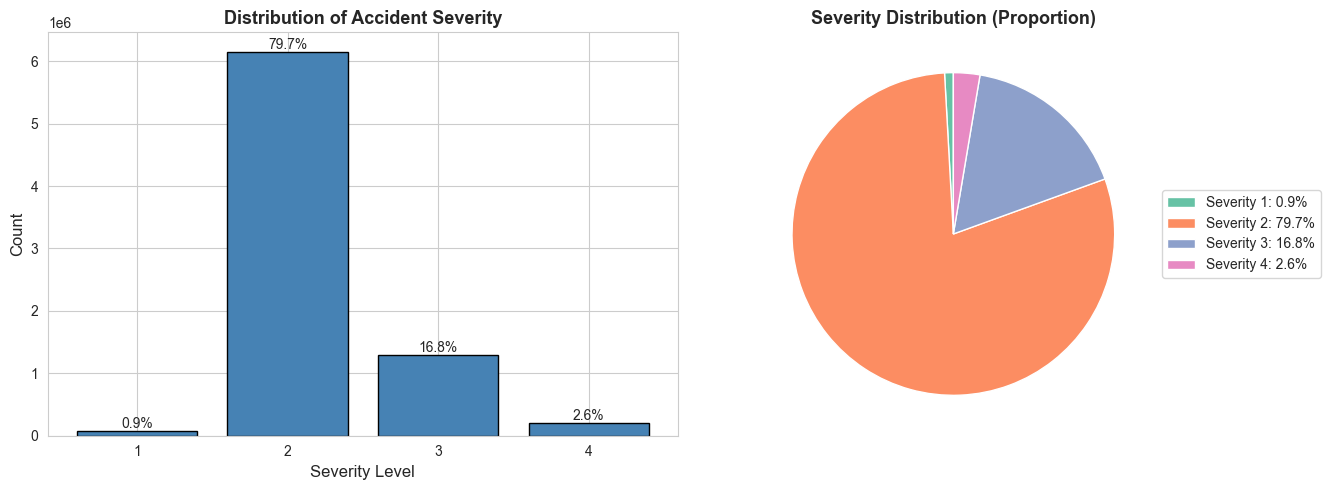


Severity Statistics:
Severity
1      67366
2    6156981
3    1299337
4     204710
Name: count, dtype: int64

Class Balance: This is important for model training
Plot saved to outputs/severity_distribution.png


In [42]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
severity_counts = df['Severity'].value_counts().sort_index()
axes[0].bar(severity_counts.index, severity_counts.values, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Severity Level', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Distribution of Accident Severity', fontsize=13, fontweight='bold')
axes[0].set_xticks(severity_counts.index)

# Add percentage labels
total = severity_counts.sum()
for i, v in enumerate(severity_counts.values):
    axes[0].text(severity_counts.index[i], v, f'{(v/total)*100:.1f}%', ha='center', va='bottom', fontsize=10)

# Pie chart - create labels with percentages
labels_with_pct = [f'Severity {level}: {(count/total)*100:.1f}%' for level, count in zip(severity_counts.index, severity_counts.values)]

axes[1].pie(severity_counts.values, labels=None, startangle=90, colors=sns.color_palette('Set2'))
axes[1].set_title('Severity Distribution (Proportion)', fontsize=13, fontweight='bold')
axes[1].legend(labels_with_pct, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

plt.tight_layout()
plt.savefig('outputs/severity_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nSeverity Statistics:")
print(severity_counts)
print(f"\nClass Balance: This is important for model training")
print("Plot saved to outputs/severity_distribution.png")

### 9. Numeric Features - Histograms & Boxplots

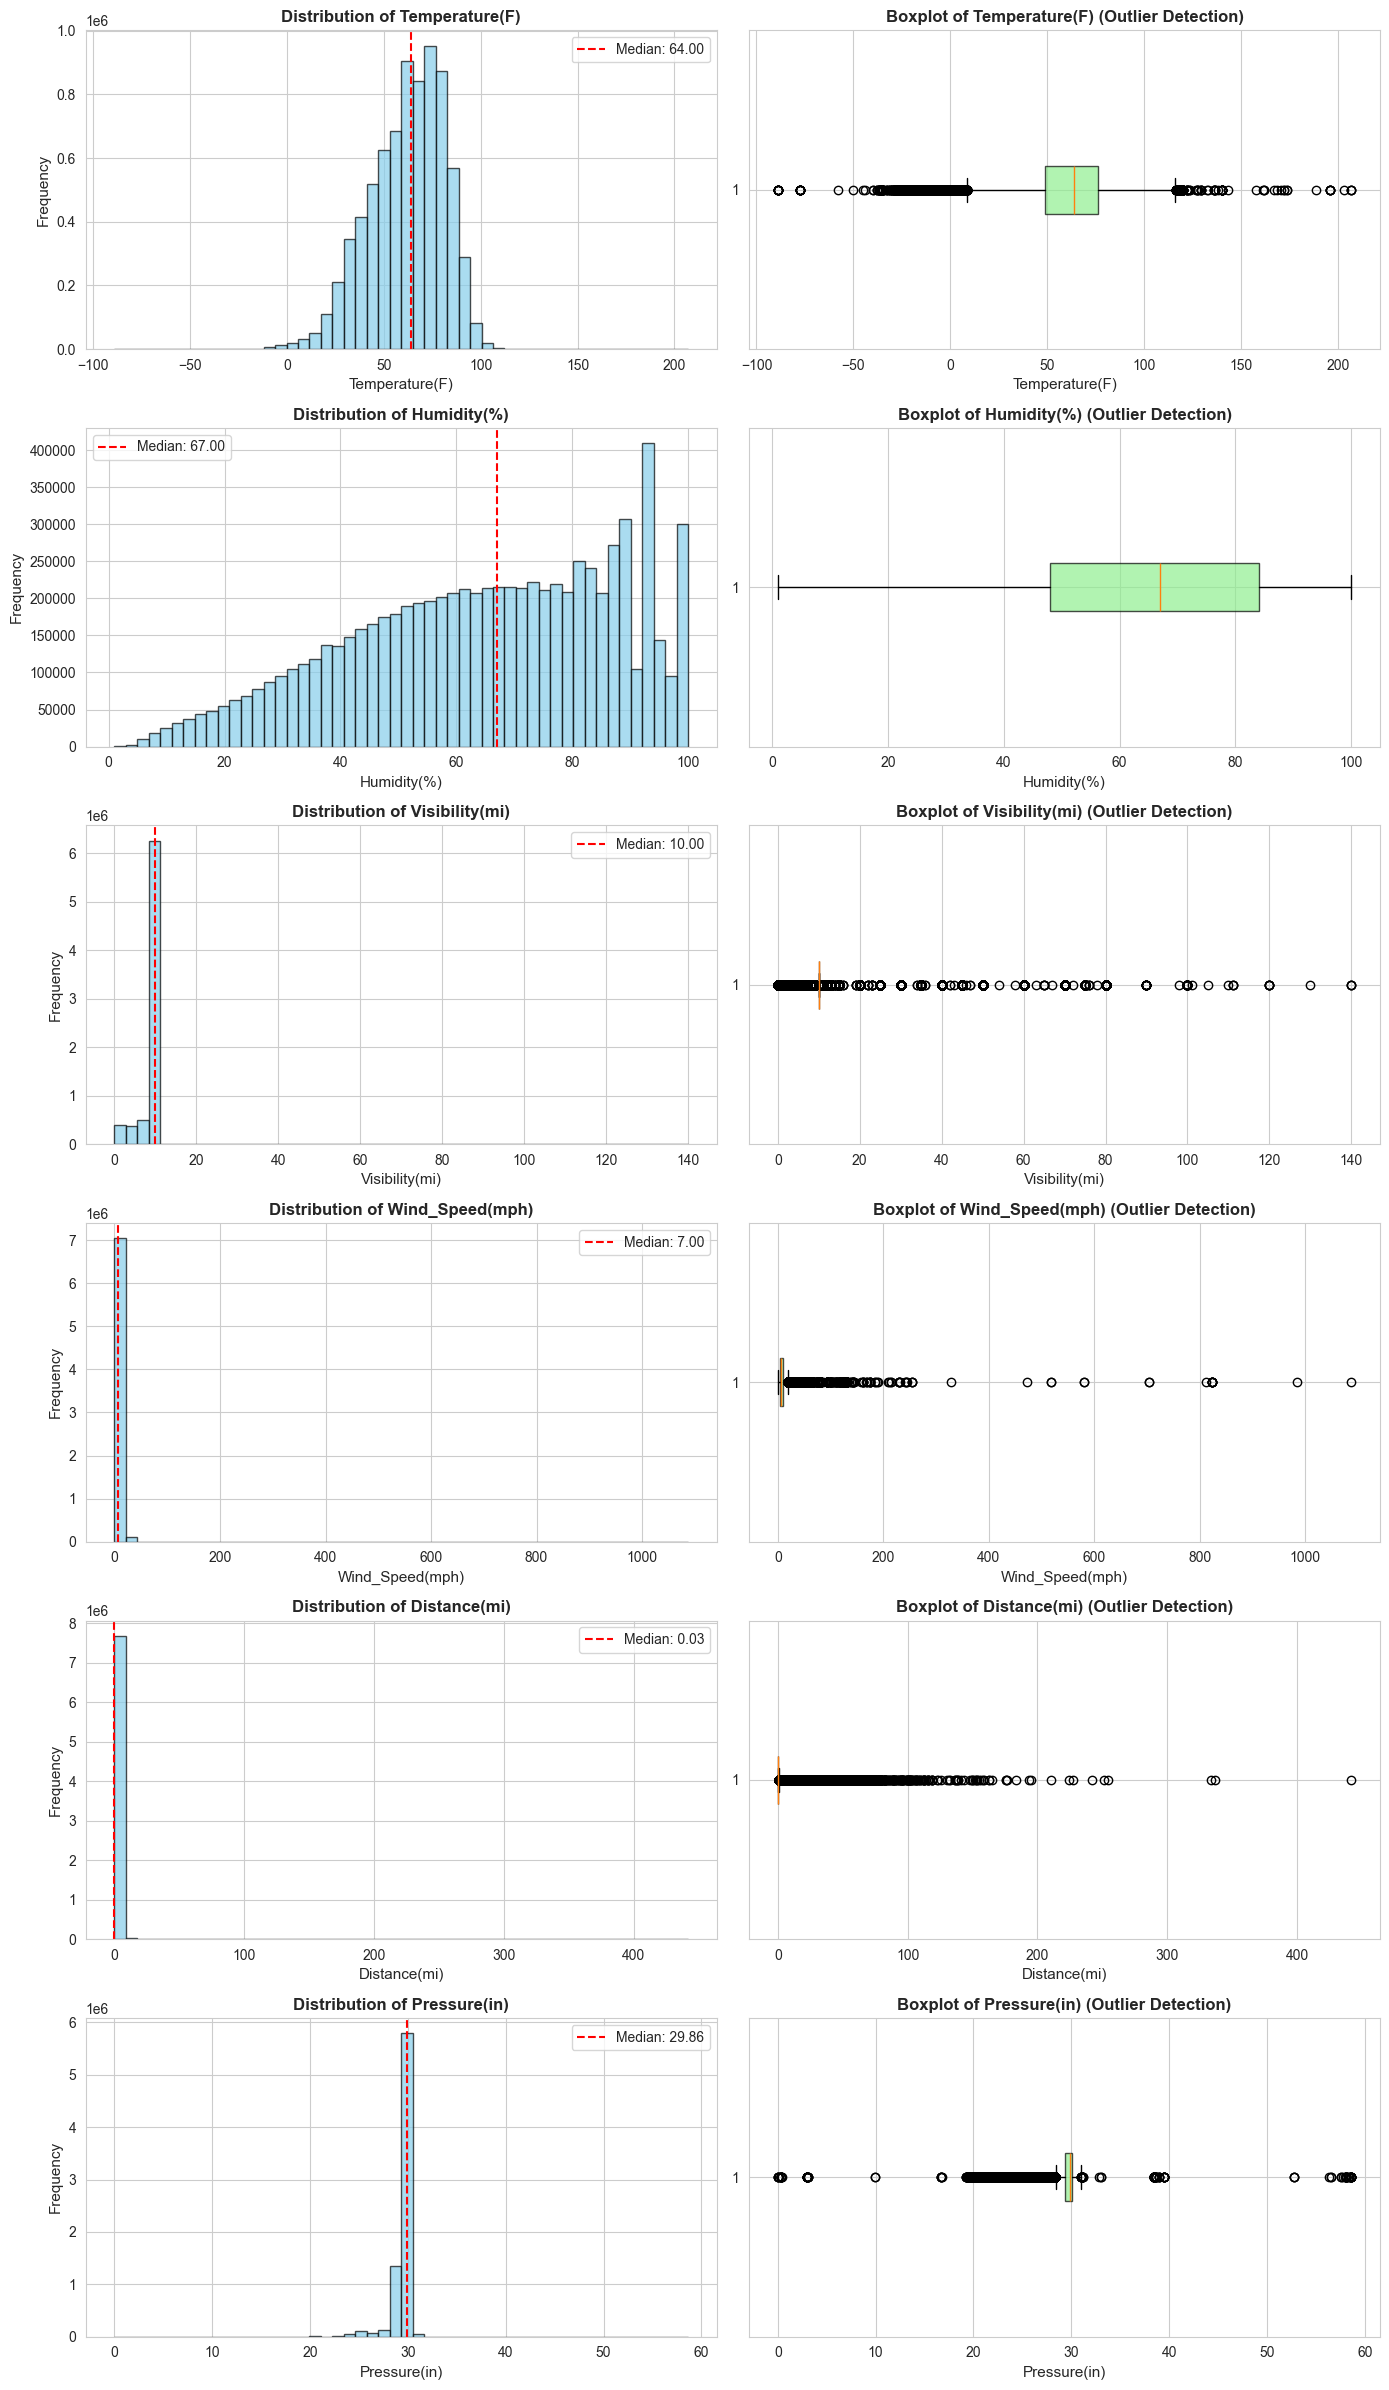

Numeric distributions saved to outputs/numeric_distributions.png


In [43]:
# Select key numeric features for analysis
numeric_features = ['Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Distance(mi)', 'Pressure(in)']

existing_numeric = [col for col in numeric_features if col in df.columns]

fig, axes = plt.subplots(len(existing_numeric), 2, figsize=(14, 4*len(existing_numeric)))

for idx, col in enumerate(existing_numeric):
    # Histogram
    axes[idx, 0].hist(df[col].dropna(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx, 0].set_xlabel(col, fontsize=11)
    axes[idx, 0].set_ylabel('Frequency', fontsize=11)
    axes[idx, 0].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx, 0].axvline(df[col].median(), color='red', linestyle='--', label=f'Median: {df[col].median():.2f}')
    axes[idx, 0].legend()
    
    # Boxplot
    axes[idx, 1].boxplot(df[col].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen', alpha=0.7))
    axes[idx, 1].set_xlabel(col, fontsize=11)
    axes[idx, 1].set_title(f'Boxplot of {col} (Outlier Detection)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('outputs/numeric_distributions.png', dpi=300, bbox_inches='tight')
plt.show()
print("Numeric distributions saved to outputs/numeric_distributions.png")

In [44]:
# Statistical summary of numeric features
print("Statistical Summary of Key Numeric Features:")
df[existing_numeric].describe()

Statistical Summary of Key Numeric Features:


,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Distance(mi),Pressure(in)
count,7.564541e+06,7.554250e+06,7.551296e+06,7.157161e+06,7.728394e+06,7.587715e+06
mean,6.166329e+01,6.483104e+01,9.090376e+00,7.685490e+00,5.618423e-01,2.953899e+01
std,1.901365e+01,2.282097e+01,2.688316e+00,5.424983e+00,1.776811e+00,1.006190e+00
min,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.900000e+01,4.800000e+01,1.000000e+01,4.600000e+00,0.000000e+00,2.937000e+01
50%,6.400000e+01,6.700000e+01,1.000000e+01,7.000000e+00,3.000000e-02,2.986000e+01
75%,7.600000e+01,8.400000e+01,1.000000e+01,1.040000e+01,4.640000e-01,3.003000e+01
max,2.070000e+02,1.000000e+02,1.400000e+02,1.087000e+03,4.417500e+02,5.863000e+01


### 10. Categorical Features - Bar Charts

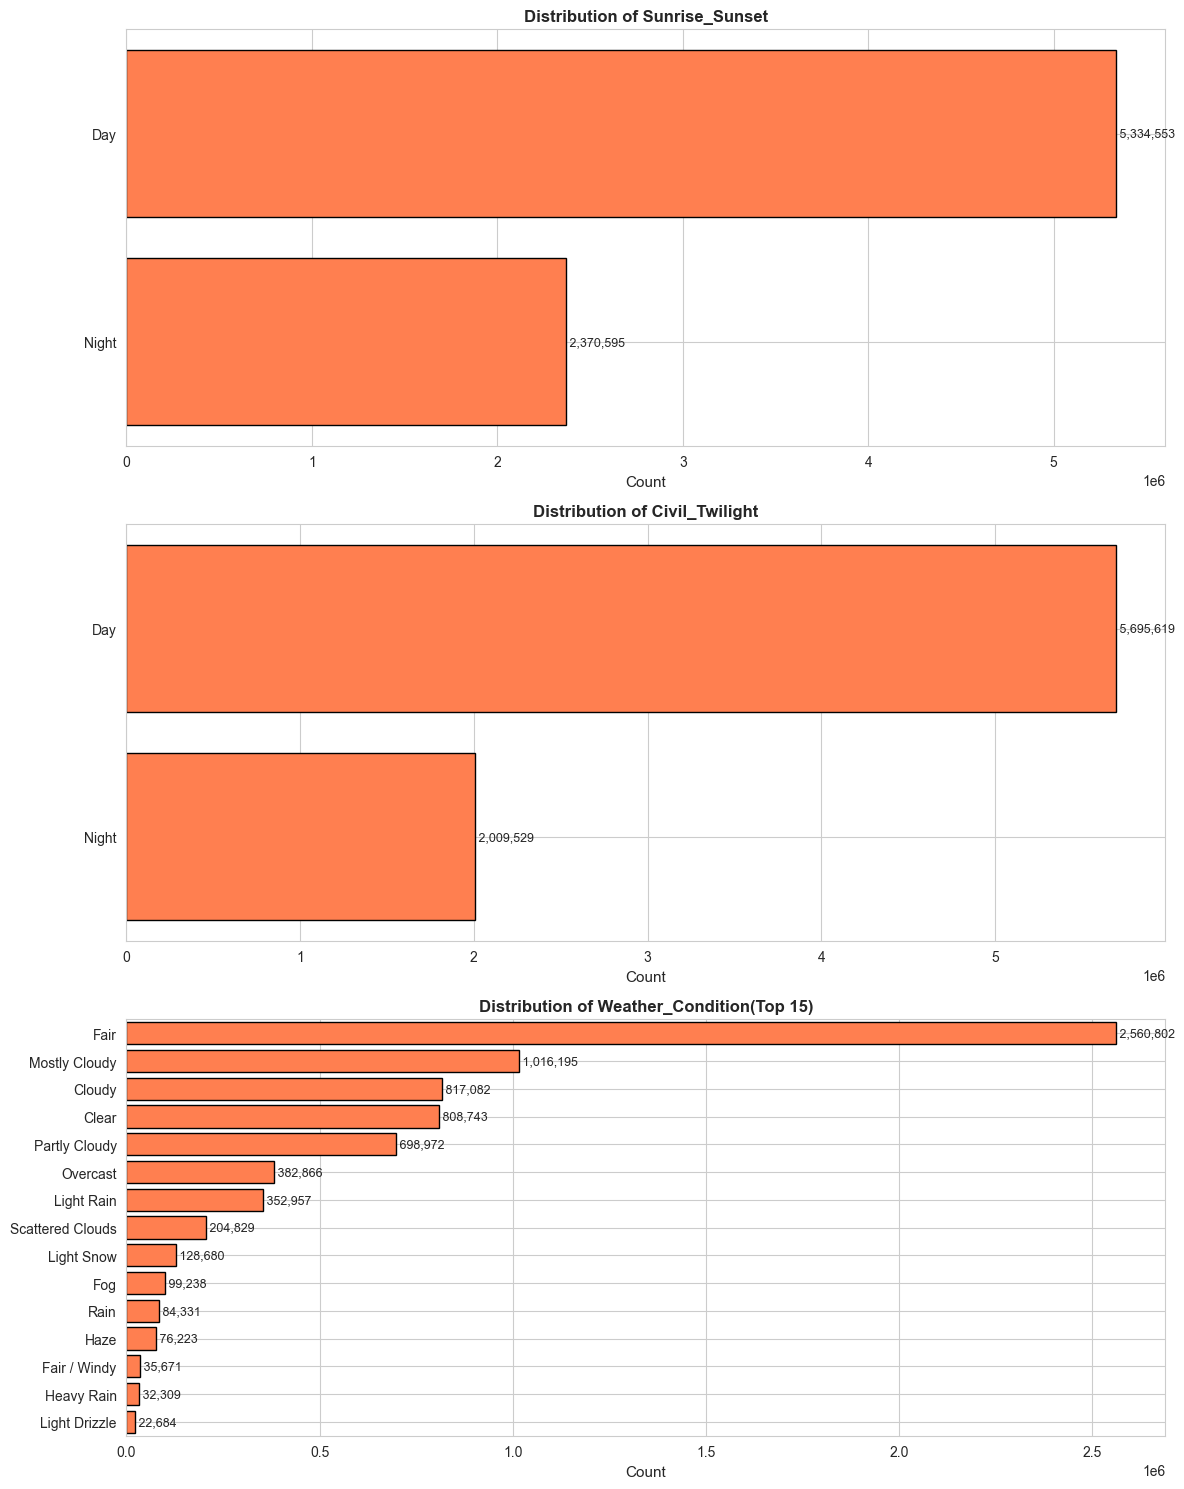

Categorical distributions saved to outputs/categorical_distributions.png


In [45]:
# Key categorical features
categorical_features = ['Sunrise_Sunset', 'Civil_Twilight', 'Weather_Condition']
existing_categorical = [col for col in categorical_features if col in df.columns]

fig, axes = plt.subplots(len(existing_categorical), 1, figsize=(12, 5*len(existing_categorical)))

if len(existing_categorical) == 1:
    axes = [axes]

for idx, col in enumerate(existing_categorical):
    # For high cardinality, show top 15
    value_counts = df[col].value_counts()
    
    if len(value_counts) > 15:
        value_counts = value_counts.head(15)
        title_suffix = "(Top 15)"
    else:
        title_suffix = ""
    
    axes[idx].barh(range(len(value_counts)), value_counts.values, color='coral', edgecolor='black')
    axes[idx].set_yticks(range(len(value_counts)))
    axes[idx].set_yticklabels(value_counts.index, fontsize=10)
    axes[idx].set_xlabel('Count', fontsize=11)
    axes[idx].set_title(f'Distribution of {col}{title_suffix}', fontsize=12, fontweight='bold')
    axes[idx].set_ylim(-0.5, len(value_counts) - 0.5)
    axes[idx].invert_yaxis()
    
    # Add count labels
    for i, v in enumerate(value_counts.values):
        axes[idx].text(v, i, f' {v:,}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('outputs/categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()
print("Categorical distributions saved to outputs/categorical_distributions.png")

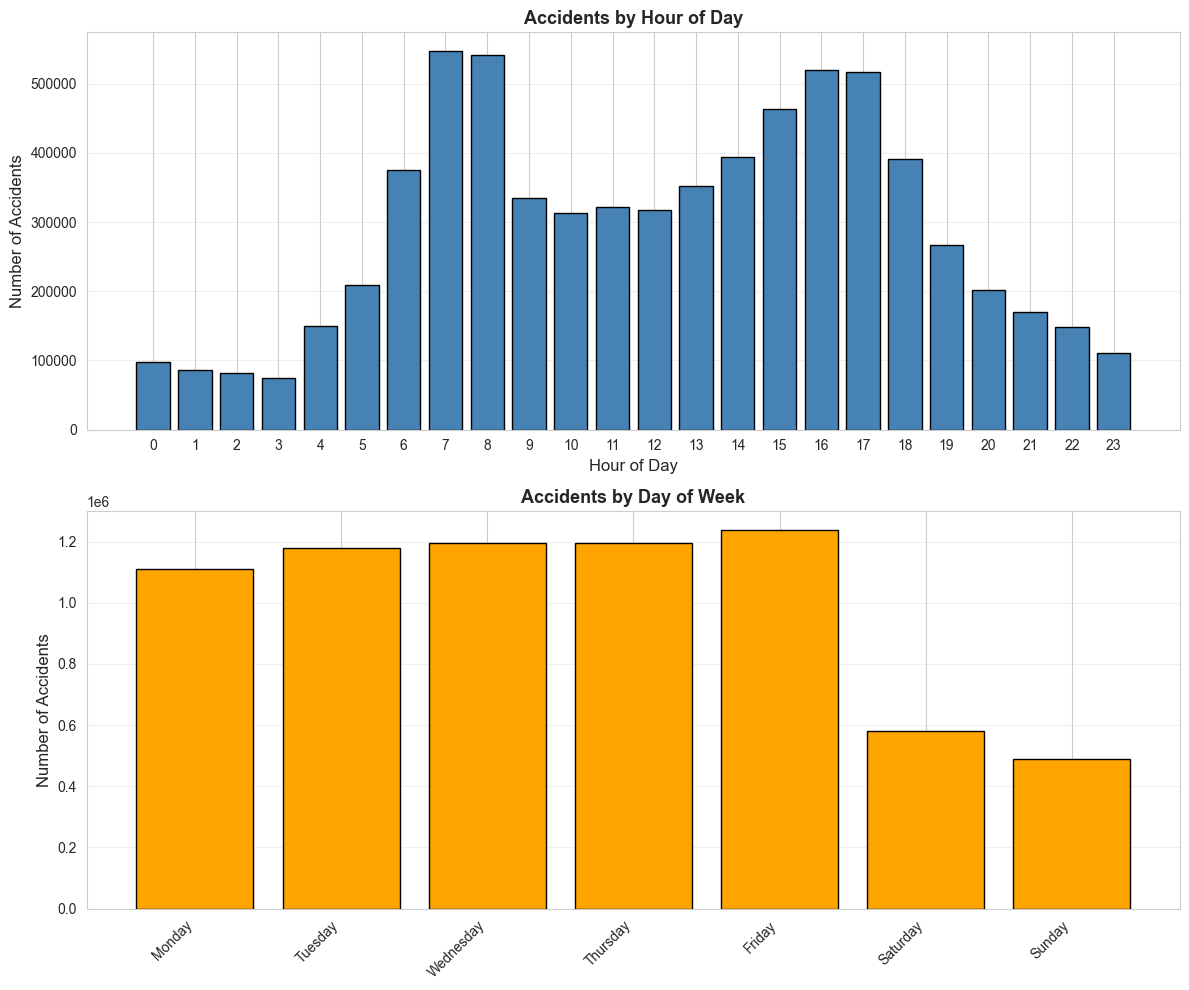

Time distributions saved to outputs/time_distributions.png


In [46]:
# Time-based analysis: Extract hour from Start_Time
if 'Start_Time' in df.columns:
    df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
    df['Hour'] = df['Start_Time'].dt.hour
    df['DayOfWeek'] = df['Start_Time'].dt.day_name()
    
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))
    
    # Accidents by hour
    hour_counts = df['Hour'].value_counts().sort_index()
    axes[0].bar(hour_counts.index, hour_counts.values, color='steelblue', edgecolor='black')
    axes[0].set_xlabel('Hour of Day', fontsize=12)
    axes[0].set_ylabel('Number of Accidents', fontsize=12)
    axes[0].set_title('Accidents by Hour of Day', fontsize=13, fontweight='bold')
    axes[0].set_xticks(range(0, 24))
    axes[0].grid(axis='y', alpha=0.3)
    
    # Accidents by day of week
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_counts = df['DayOfWeek'].value_counts().reindex(day_order)
    axes[1].bar(range(len(day_counts)), day_counts.values, color='orange', edgecolor='black')
    axes[1].set_xticks(range(len(day_counts)))
    axes[1].set_xticklabels(day_order, rotation=45, ha='right')
    axes[1].set_ylabel('Number of Accidents', fontsize=12)
    axes[1].set_title('Accidents by Day of Week', fontsize=13, fontweight='bold')
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('outputs/time_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Time distributions saved to outputs/time_distributions.png")

---
## Core Bivariate Plots

### 11. Numeric-Numeric: Scatter Plots & Pairwise Relationships

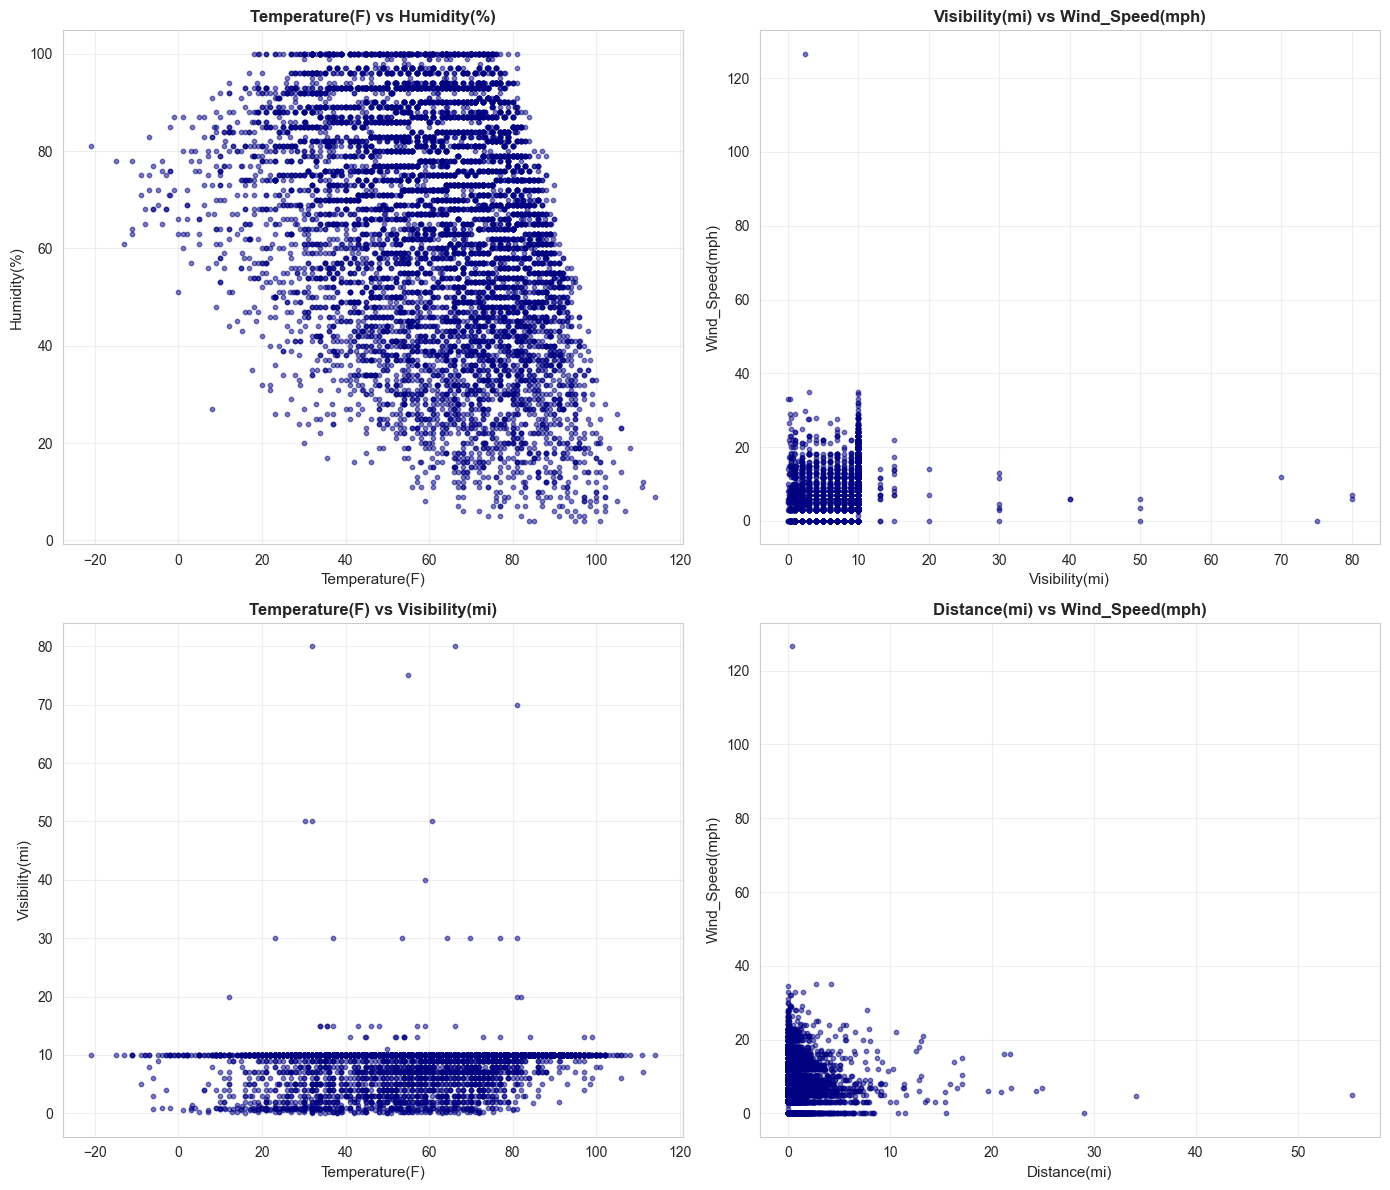

Scatter plots saved to outputs/numeric_scatter_plots.png (sample size: 10,000)


In [47]:
# Sample data for scatter plots (large dataset makes it very slow)
sample_size = min(10000, len(df))
df_sample = df.sample(n=sample_size, random_state=42)

# Key scatter plots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

scatter_pairs = [
    ('Temperature(F)', 'Humidity(%)'),
    ('Visibility(mi)', 'Wind_Speed(mph)'),
    ('Temperature(F)', 'Visibility(mi)'),
    ('Distance(mi)', 'Wind_Speed(mph)')
]

for idx, (x_col, y_col) in enumerate(scatter_pairs):
    row, col = idx // 2, idx % 2
    if x_col in df.columns and y_col in df.columns:
        axes[row, col].scatter(df_sample[x_col], df_sample[y_col], alpha=0.5, s=10, c='navy')
        axes[row, col].set_xlabel(x_col, fontsize=11)
        axes[row, col].set_ylabel(y_col, fontsize=11)
        axes[row, col].set_title(f'{x_col} vs {y_col}', fontsize=12, fontweight='bold')
        axes[row, col].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/numeric_scatter_plots.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"Scatter plots saved to outputs/numeric_scatter_plots.png (sample size: {sample_size:,})")

### 12. Categorical-Numeric: Grouped Box / Violin Plots

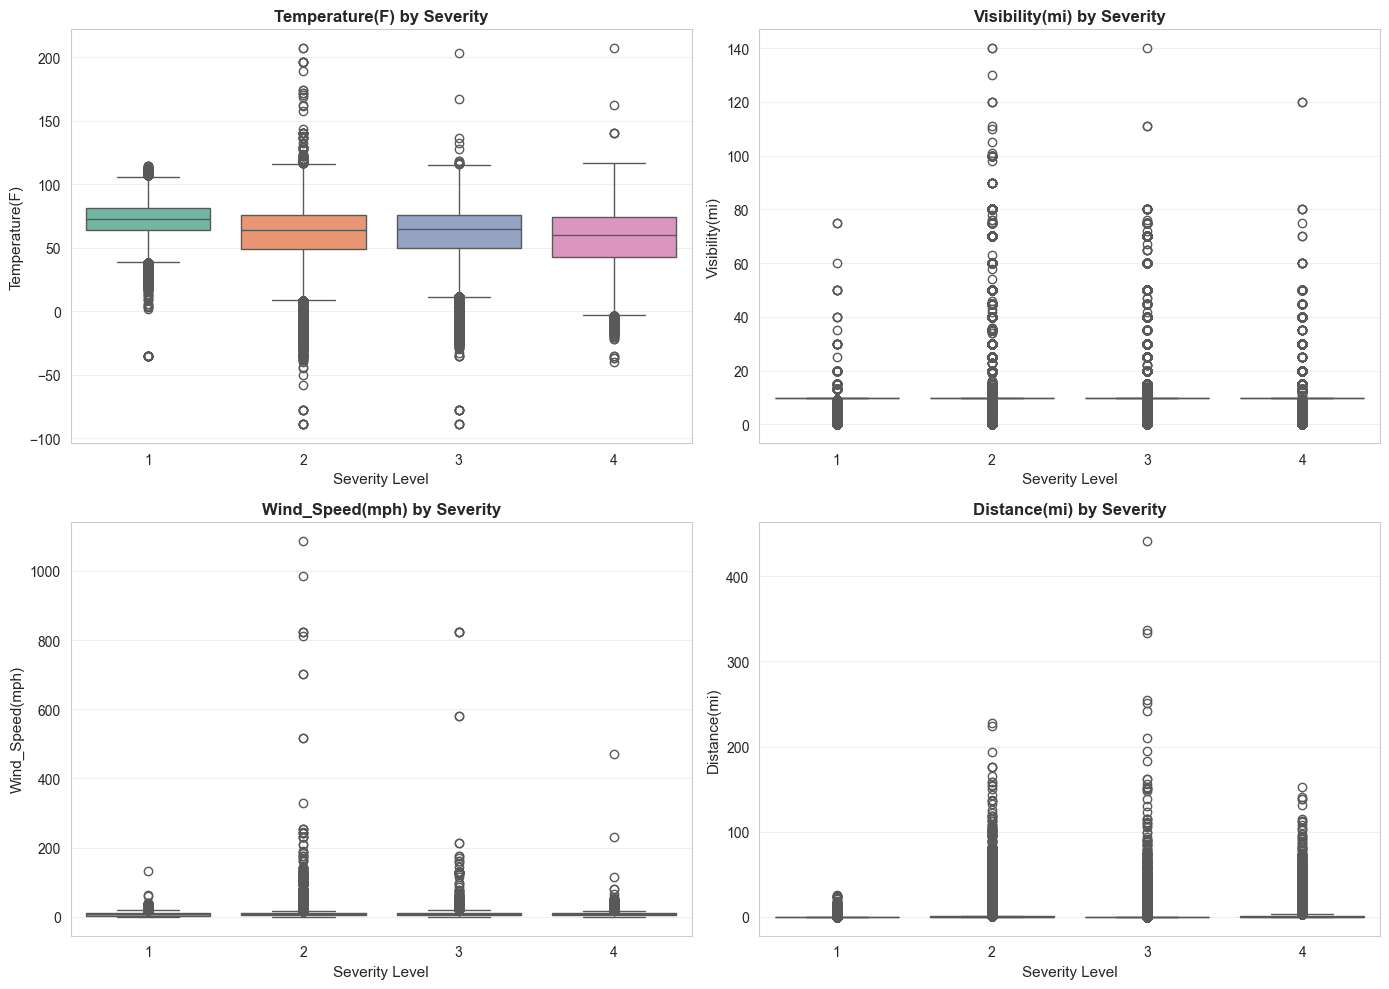

Severity vs Numeric features saved to outputs/severity_vs_numeric.png


In [48]:
# Severity vs key numeric features
numeric_for_severity = ['Temperature(F)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Distance(mi)']
existing_for_severity = [col for col in numeric_for_severity if col in df.columns]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, col in enumerate(existing_for_severity[:4]):
    sns.boxplot(data=df, x='Severity', y=col, ax=axes[idx], palette='Set2')
    axes[idx].set_xlabel('Severity Level', fontsize=11)
    axes[idx].set_ylabel(col, fontsize=11)
    axes[idx].set_title(f'{col} by Severity', fontsize=12, fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/severity_vs_numeric.png', dpi=300, bbox_inches='tight')
plt.show()
print("Severity vs Numeric features saved to outputs/severity_vs_numeric.png")

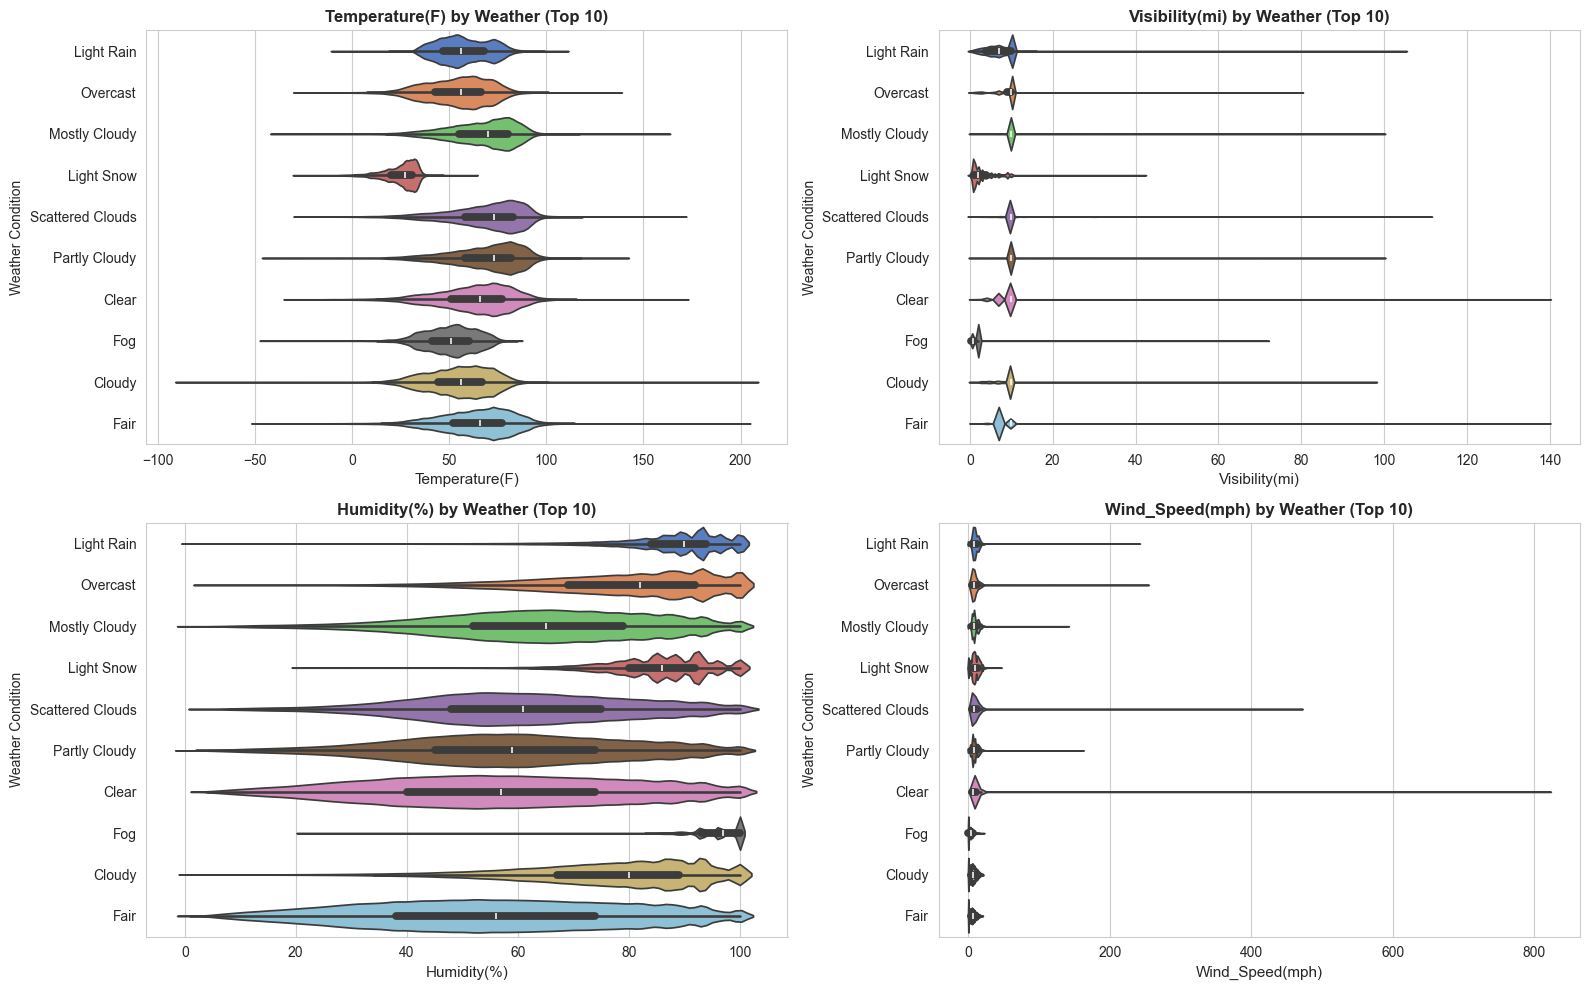

Weather vs Numeric features saved to outputs/weather_vs_numeric.png


In [49]:
# Weather condition vs numeric features (sample for clarity)
if 'Weather_Condition' in df.columns:
    # Get top 10 weather conditions
    top_weather = df['Weather_Condition'].value_counts().head(10).index
    df_weather_sample = df[df['Weather_Condition'].isin(top_weather)]
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    axes = axes.flatten()
    
    numeric_cols_weather = ['Temperature(F)', 'Visibility(mi)', 'Humidity(%)', 'Wind_Speed(mph)']
    existing_weather = [col for col in numeric_cols_weather if col in df.columns]
    
    for idx, col in enumerate(existing_weather[:4]):
        sns.violinplot(data=df_weather_sample, y='Weather_Condition', x=col, ax=axes[idx], palette='muted', orient='h')
        axes[idx].set_ylabel('Weather Condition', fontsize=10)
        axes[idx].set_xlabel(col, fontsize=11)
        axes[idx].set_title(f'{col} by Weather (Top 10)', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('outputs/weather_vs_numeric.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Weather vs Numeric features saved to outputs/weather_vs_numeric.png")

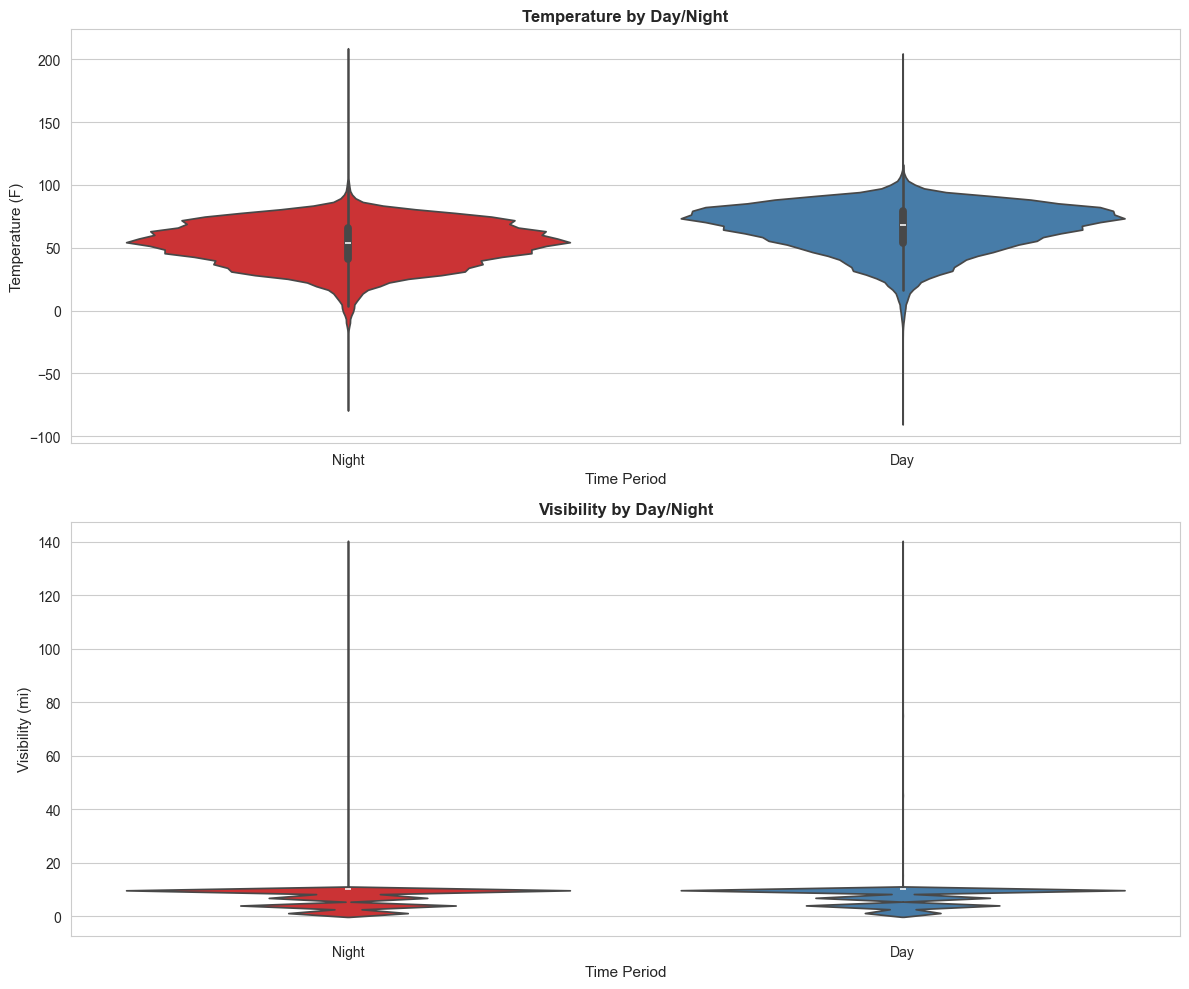

Day/Night comparison saved to outputs/day_night_comparison.png


In [50]:
# Day vs Night analysis
if 'Sunrise_Sunset' in df.columns:
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))
    
    # Temperature by day/night
    if 'Temperature(F)' in df.columns:
        sns.violinplot(data=df, x='Sunrise_Sunset', y='Temperature(F)', ax=axes[0], palette='Set1')
        axes[0].set_title('Temperature by Day/Night', fontsize=12, fontweight='bold')
        axes[0].set_xlabel('Time Period', fontsize=11)
        axes[0].set_ylabel('Temperature (F)', fontsize=11)
    
    # Visibility by day/night
    if 'Visibility(mi)' in df.columns:
        sns.violinplot(data=df, x='Sunrise_Sunset', y='Visibility(mi)', ax=axes[1], palette='Set1')
        axes[1].set_title('Visibility by Day/Night', fontsize=12, fontweight='bold')
        axes[1].set_xlabel('Time Period', fontsize=11)
        axes[1].set_ylabel('Visibility (mi)', fontsize=11)
    
    plt.tight_layout()
    plt.savefig('outputs/day_night_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Day/Night comparison saved to outputs/day_night_comparison.png")

### 13. Categorical-Categorical: Stacked Bar Charts

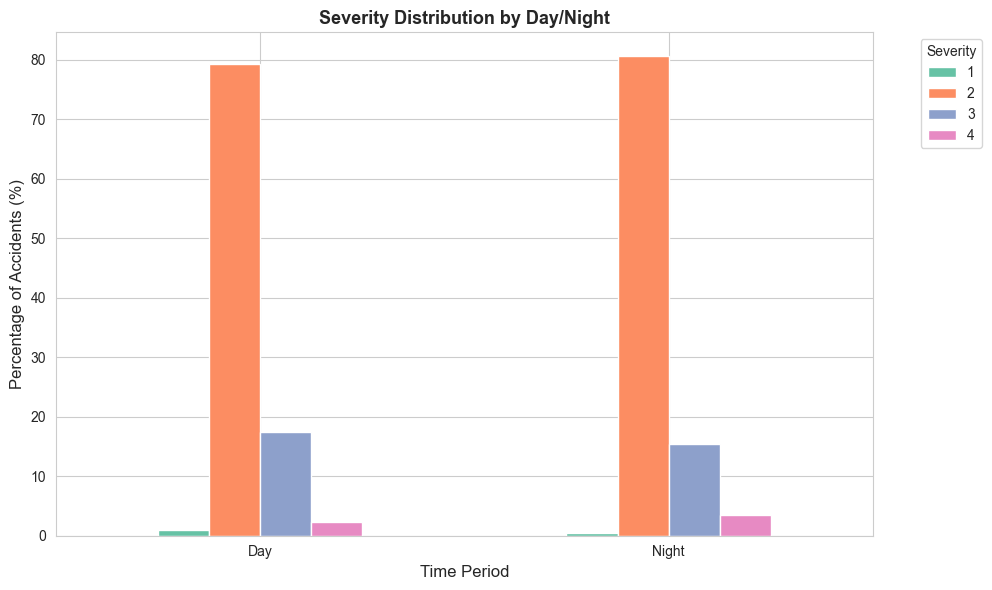

Severity by day/night saved to outputs/severity_by_daynight.png


In [51]:
# Severity by Day/Night and Weather
if 'Sunrise_Sunset' in df.columns:
    # Create crosstab
    ct = pd.crosstab(df['Sunrise_Sunset'], df['Severity'], normalize='index') * 100
    
    ct.plot(kind='bar', stacked=False, figsize=(10, 6), color=sns.color_palette('Set2'))
    plt.title('Severity Distribution by Day/Night', fontsize=13, fontweight='bold')
    plt.xlabel('Time Period', fontsize=12)
    plt.ylabel('Percentage of Accidents (%)', fontsize=12)
    plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.savefig('outputs/severity_by_daynight.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Severity by day/night saved to outputs/severity_by_daynight.png")

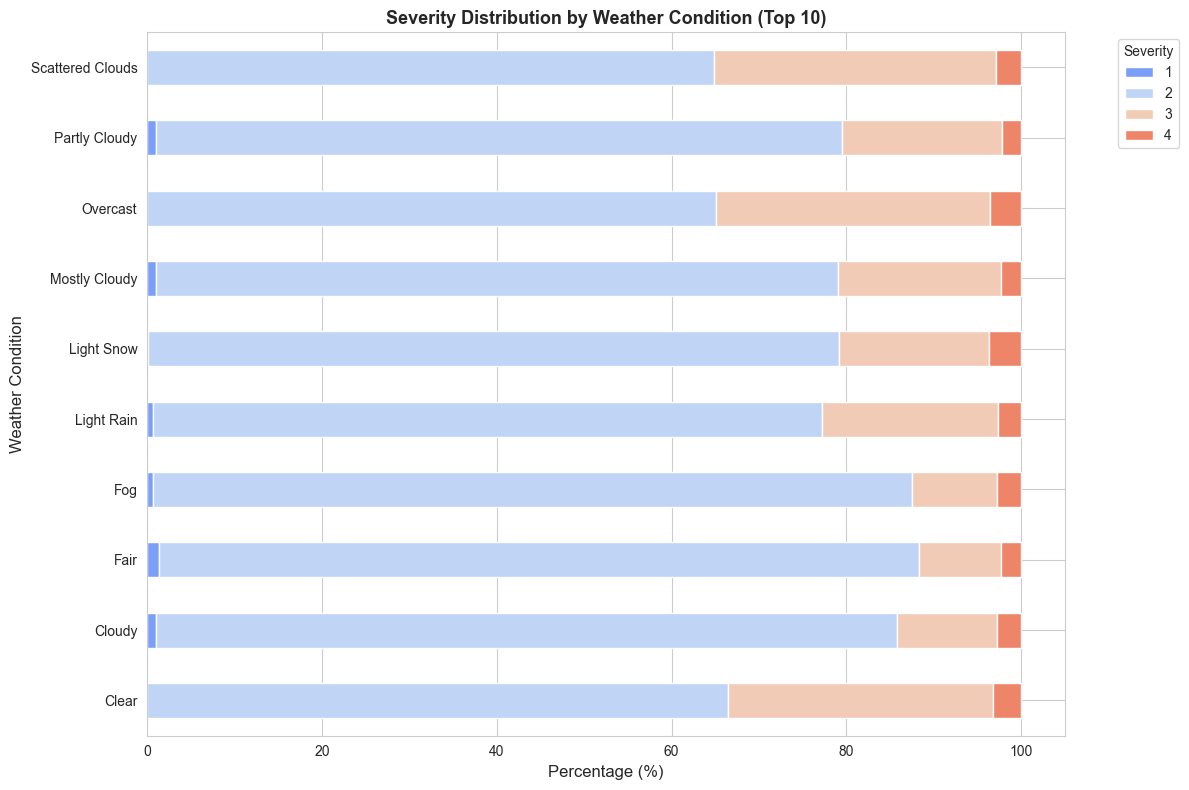

Severity by weather saved to outputs/severity_by_weather.png


In [52]:
# Severity by top weather conditions
if 'Weather_Condition' in df.columns:
    top_10_weather = df['Weather_Condition'].value_counts().head(10).index
    df_top_weather = df[df['Weather_Condition'].isin(top_10_weather)]
    
    ct_weather = pd.crosstab(df_top_weather['Weather_Condition'], df_top_weather['Severity'])
    ct_weather_pct = ct_weather.div(ct_weather.sum(axis=1), axis=0) * 100
    
    ct_weather_pct.plot(kind='barh', stacked=True, figsize=(12, 8), color=sns.color_palette('coolwarm', 4))
    plt.title('Severity Distribution by Weather Condition (Top 10)', fontsize=13, fontweight='bold')
    plt.xlabel('Percentage (%)', fontsize=12)
    plt.ylabel('Weather Condition', fontsize=12)
    plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig('outputs/severity_by_weather.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Severity by weather saved to outputs/severity_by_weather.png")

---
## Relationships & Dependence

### 14. Correlation Matrix (Numeric Features)

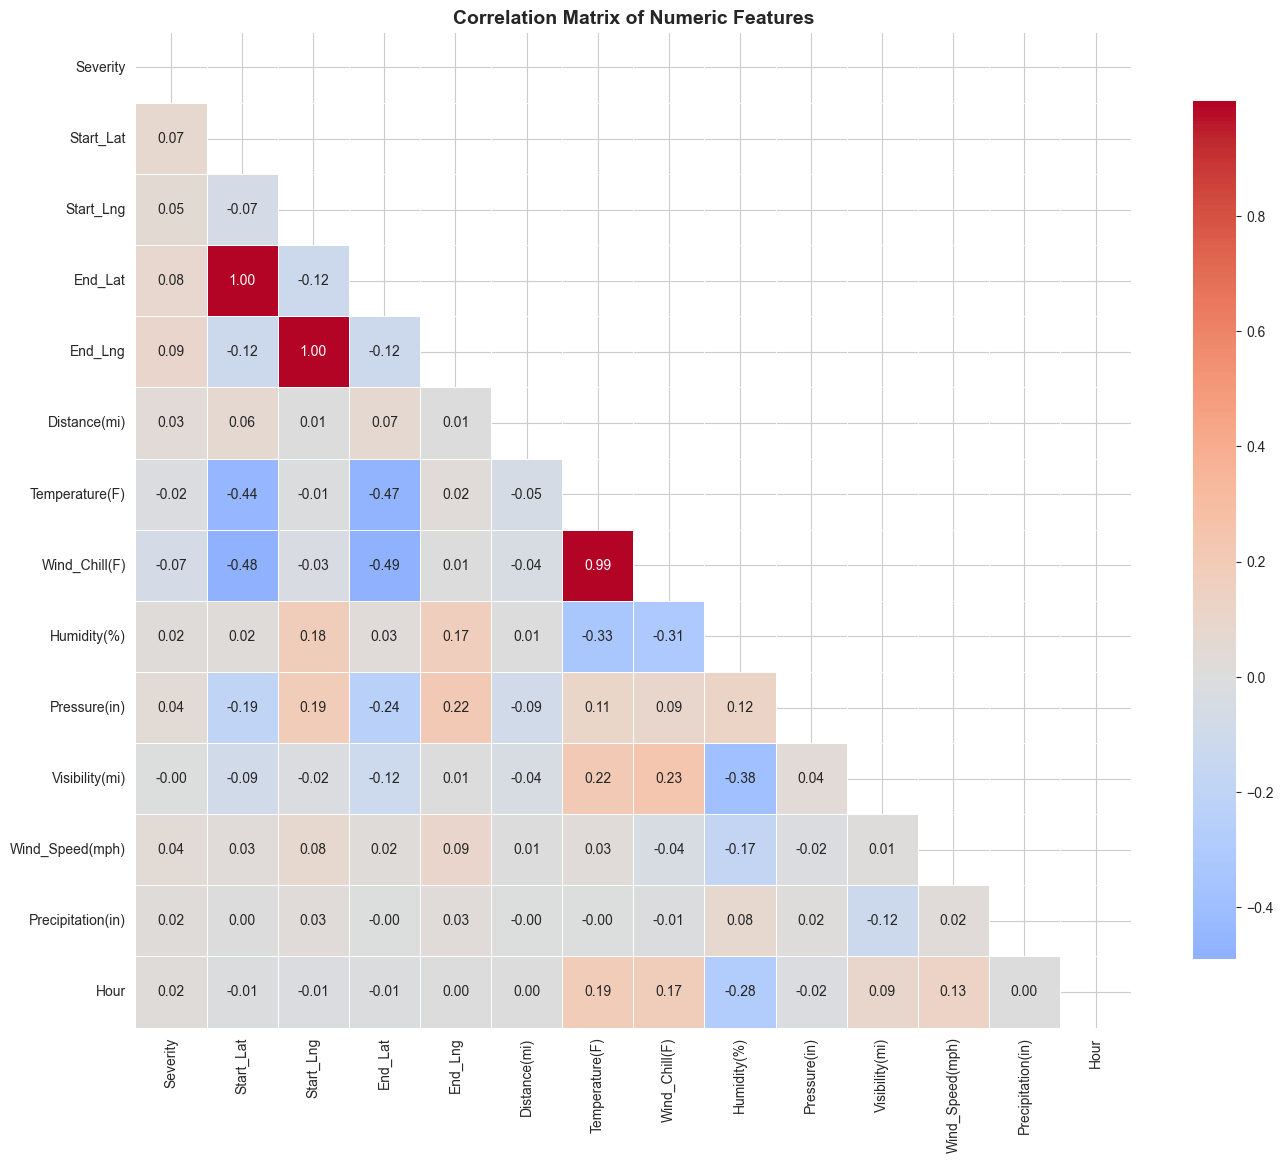

Correlation matrix saved to outputs/correlation_matrix.png


In [53]:
# Select numeric columns for correlation
numeric_cols_corr = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove ID-like columns if any
exclude_cols = ['ID', 'Number', 'Zipcode']
numeric_cols_corr = [col for col in numeric_cols_corr if not any(exc in col for exc in exclude_cols)]

# Calculate correlation matrix
corr_matrix = df[numeric_cols_corr].corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numeric Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('outputs/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print("Correlation matrix saved to outputs/correlation_matrix.png")

In [54]:
# Identify highly correlated pairs (|correlation| > 0.7)
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append({
                'Feature 1': corr_matrix.columns[i],
                'Feature 2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })

if high_corr_pairs:
    print("Highly Correlated Feature Pairs (|r| > 0.7):")
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', key=abs, ascending=False)
    display(high_corr_df)
    print("\nHigh correlation may indicate multicollinearity - consider feature selection")
else:
    print("No highly correlated pairs found (|r| > 0.7)")

Highly Correlated Feature Pairs (|r| > 0.7):


,Feature 1,Feature 2,Correlation
1,Start_Lng,End_Lng,0.999999
0,Start_Lat,End_Lat,0.999993
2,Temperature(F),Wind_Chill(F),0.993744



High correlation may indicate multicollinearity - consider feature selection


### 15. Grouped Summaries - Target by Categories

Top 15 Weather Conditions by Mean Severity:


,mean,median,count
Weather_Condition,,,
Light Blowing Snow,3.666667,4.0,3
Patches of Fog / Windy,3.142857,3.0,7
Heavy Freezing Rain / Windy,3.000000,3.0,1
Light Fog,3.000000,3.0,4
Partial Fog / Windy,3.000000,3.0,1
Heavy Thunderstorms and Snow,2.800000,3.0,5
Light Thunderstorms and Snow,2.772727,3.0,22
Heavy Ice Pellets,2.750000,3.0,4
Heavy Blowing Snow,2.750000,3.0,4


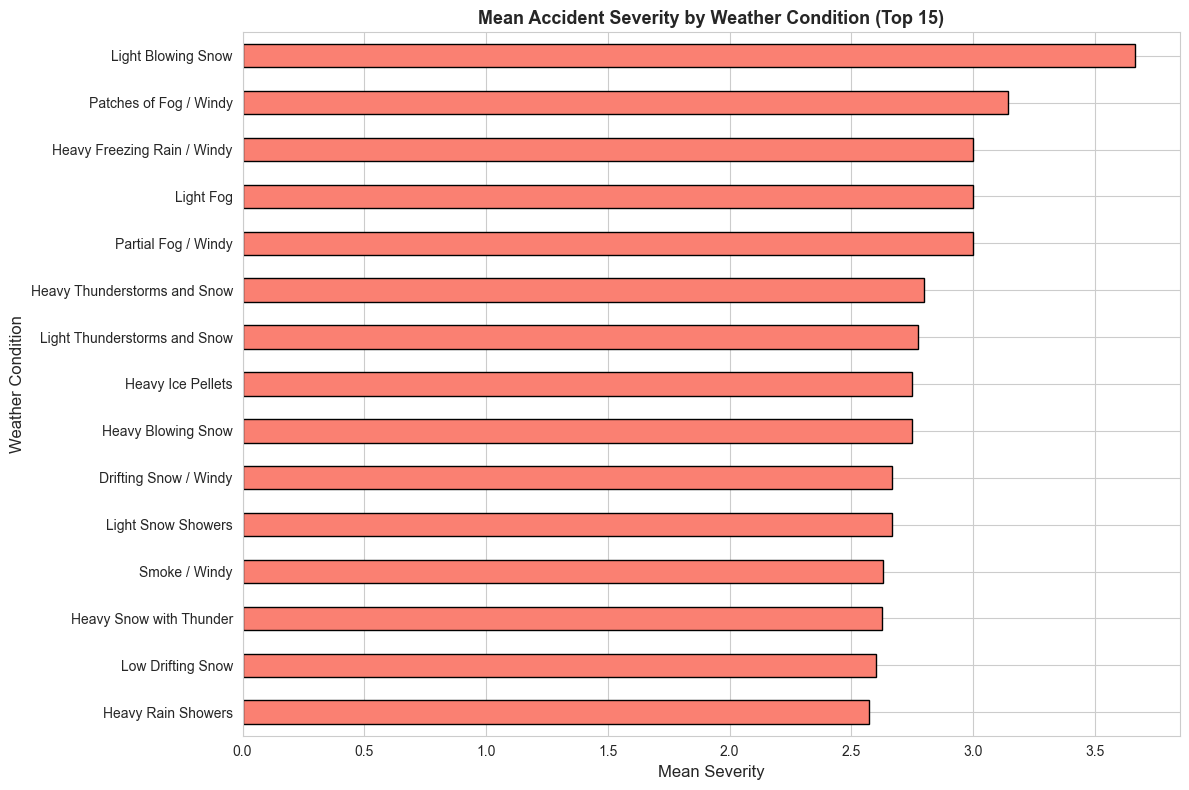

Plot saved to outputs/mean_severity_by_weather.png


In [55]:
# Mean/Median severity by weather condition
if 'Weather_Condition' in df.columns:
    weather_severity = df.groupby('Weather_Condition')['Severity'].agg(['mean', 'median', 'count'])
    weather_severity = weather_severity.sort_values('mean', ascending=False).head(15)
    
    print("Top 15 Weather Conditions by Mean Severity:")
    print("=" * 80)
    display(weather_severity)
    
    # Visualize
    fig, ax = plt.subplots(figsize=(12, 8))
    weather_severity['mean'].plot(kind='barh', ax=ax, color='salmon', edgecolor='black')
    ax.set_xlabel('Mean Severity', fontsize=12)
    ax.set_ylabel('Weather Condition', fontsize=12)
    ax.set_title('Mean Accident Severity by Weather Condition (Top 15)', fontsize=13, fontweight='bold')
    ax.invert_yaxis()
    plt.tight_layout()
    plt.savefig('outputs/mean_severity_by_weather.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Plot saved to outputs/mean_severity_by_weather.png")

In [56]:
# Severity by time period (Day/Night)
if 'Sunrise_Sunset' in df.columns:
    time_severity = df.groupby('Sunrise_Sunset')['Severity'].agg(['mean', 'median', 'count'])
    print("\nSeverity Statistics by Day/Night:")
    display(time_severity)

# Severity by state (top 10)
if 'State' in df.columns:
    state_severity = df.groupby('State')['Severity'].agg(['mean', 'median', 'count'])
    state_severity = state_severity.sort_values('count', ascending=False).head(10)
    
    print("\nTop 10 States by Accident Count - Severity Stats:")
    display(state_severity)


Severity Statistics by Day/Night:


,mean,median,count
Sunrise_Sunset,,,
Day,2.209396,2.0,5334553
Night,2.219069,2.0,2370595



Top 10 States by Accident Count - Severity Stats:


,mean,median,count
State,,,
CA,2.165688,2.0,1741433
FL,2.140060,2.0,880192
TX,2.224124,2.0,582837
SC,2.111055,2.0,382557
NY,2.259550,2.0,347960
NC,2.133824,2.0,338199
VA,2.278974,2.0,303301
PA,2.205765,2.0,296620
MN,2.162018,2.0,192084


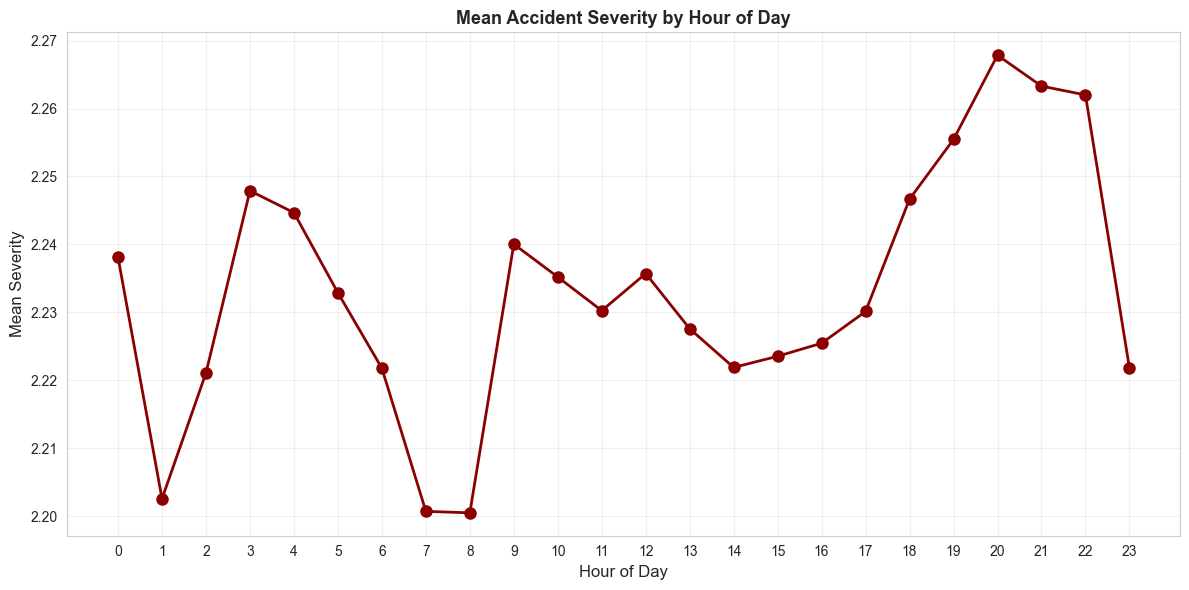

Severity by hour saved to outputs/severity_by_hour.png


In [57]:
# Severity by hour of day
if 'Hour' in df.columns:
    hour_severity = df.groupby('Hour')['Severity'].mean().sort_index()
    
    plt.figure(figsize=(12, 6))
    plt.plot(hour_severity.index, hour_severity.values, marker='o', linewidth=2, markersize=8, color='darkred')
    plt.xlabel('Hour of Day', fontsize=12)
    plt.ylabel('Mean Severity', fontsize=12)
    plt.title('Mean Accident Severity by Hour of Day', fontsize=13, fontweight='bold')
    plt.xticks(range(0, 24))
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig('outputs/severity_by_hour.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Severity by hour saved to outputs/severity_by_hour.png")

### 16. Geographic Visualization (Location Coordinates)

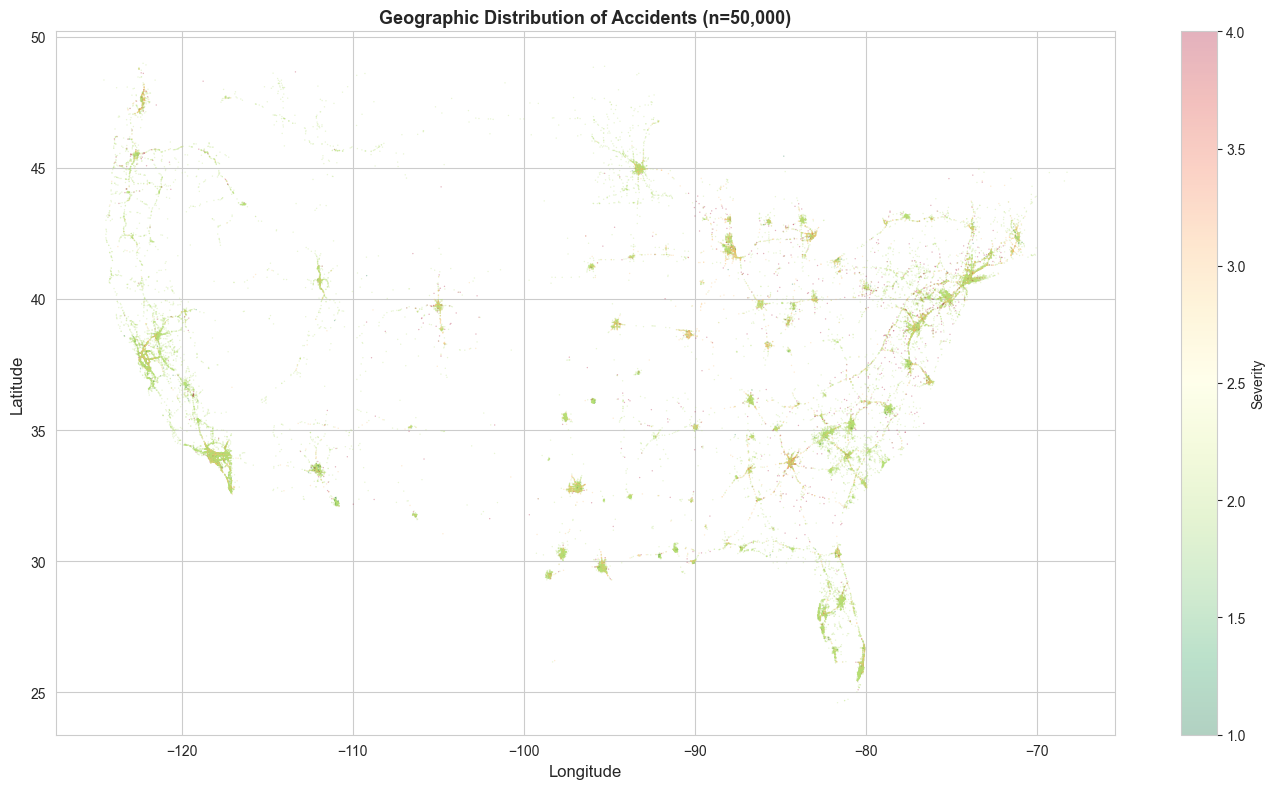

Geographic distribution saved to outputs/geographic_distribution.png


In [58]:
# Geographic scatter plot (sampled for performance)
if 'Start_Lat' in df.columns and 'Start_Lng' in df.columns:
    sample_size_geo = min(50000, len(df))
    df_geo_sample = df.sample(n=sample_size_geo, random_state=42)
    
    plt.figure(figsize=(14, 8))
    scatter = plt.scatter(df_geo_sample['Start_Lng'], df_geo_sample['Start_Lat'], c=df_geo_sample['Severity'], cmap='RdYlGn_r', alpha=0.3, s=1, edgecolors='none')
    plt.colorbar(scatter, label='Severity')
    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitude', fontsize=12)
    plt.title(f'Geographic Distribution of Accidents (n={sample_size_geo:,})', fontsize=13, fontweight='bold')
    plt.tight_layout()
    plt.savefig('outputs/geographic_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Geographic distribution saved to outputs/geographic_distribution.png")

### 17. Potential Data Leakage Variables

**IMPORTANT: Variables That May Leak Information About Target (Severity)**

Based on our analysis, the following variables in the dataset could cause data leakage if used for prediction:

---

#### **Variables NOT Used in This Analysis (But Present in Dataset):**

1. **End_Time / Duration**
   - Longer cleanup time = more severe accidents
   - Derived AFTER the accident severity is determined
   - **Status**: Not included in our feature list

2. **Description / Narrative Fields**
   - May contain explicit severity mentions or post-incident details (injuries, lane closures)
   - Filled out after responders assess the incident
   - **Status**: Not included in our feature list

3. **ID / Number (Accident ID)**
   - Not leakage, but irrelevant
   - **Status**: Not included in our feature list

---

#### **Variables USED in This Analysis:**

4. **Distance(mi)**
   - Represents roadway length affected by the accident
   - Larger impact radius typically corresponds to more severity
   - Often computed at accident time or calculated later
   - **Status**: INCLUDED in EDA, but **should consider removing for modeling**

5. **Street (Exact Address)**
   - Not leakage, but risk of overfitting to specific locations
   - Contains many unique street names and causes model to remember locations
   - Should be generalized to City/State level rather than exact street address
   - **Status**: Included as categorical feature, but should be dropped or aggregated to City/State level

---

#### **Recommendations for Stage 2 (Preprocessing):**

**Safe to Use** (Available at time of prediction):
- Weather conditions (Temperature, Humidity, Visibility, Wind Speed, Precipitation)
- Time factors (Hour, Day of Week, Sunrise/Sunset)
- Location (City, State, GPS coordinates - generalized)
- Road features (Junction, Traffic Signal, Crossing, Railway, etc.)

**Do Not Use**:
- End_Time, Duration, Distance, Description fields
- Any post-incident derived metrics

---
## EDA Summary: Key Patterns & Insights

### Most Interesting Patterns Found:

---

#### **1. SEVERE CLASS IMBALANCE IN TARGET VARIABLE**

**Finding**: Severity distribution is highly imbalanced:
- **Severity 1**: <1% of accidents
- **Severity 2**: ~80% of accidents (dominant class)
- **Severity 3**: ~17% of accidents
- **Severity 4**: ~3% of accidents

**Implications**:
- Standard models will be biased toward predicting Severity 2
- Need resampling techniques (SMOTE, undersampling) or class weights
- Must use stratified sampling for train/test split
- Evaluation metrics: Use F1-score, precision-recall, not just accuracy

---

#### **2. MISSING DATA PATTERNS**

**Finding**: 22 out of 46 columns have missing values
- Weather-related features show significant missingness (Precipitation, Wind_Chill, etc.)
- End_Lat and End_Lng are missing in ~44% of rows and are redundant with Start coordinates
- Twilight variables share identical missingness and are highly correlated

**Implications**:
- Drop columns with highly missing and redundant variable (End_Lat, End_Lng, Precipitation, Wind_Chill, twilight fields)
- Impute weather features using median/mode or KNN imputation
- Consider creating "missing" indicator features

---

#### **3. TEMPORAL PATTERNS ARE SIGNIFICANT**

**Finding**: 
- Accident frequency peaks during morning and afternoon rush hours
- Day vs. Night shows similar severity distributions (~80% Severity 2 for both)
- Temporal features remain strong predictors of occurence, not severity

**Implications**:
- Hour and Day of Week are valuable predictive features
- Consider creating "rush hour" binary feature
- Time of day matters for accident frequency, but not severity distribution

---

#### **4. WEATHER CONDITIONS AFFECT SEVERITY**

**Finding**:
- Numeric weather variables show weak correlation with severity
- Visibility, Wind Speed, and Temperature show heavy skewness
- Weather_Condition likely contains more predictive information

**Implications**:
- Keep weather features but treat outliers carefully
- Prioritize categorical weather information over numerical information

---

#### **5. GEOGRAPHIC CONCENTRATION**

**Finding**:
- Accidents cluster heavily in specific states and regions
- Urban areas show higher accident density
- GPS coordinates reveal clear geographic patterns

**Implications**:
- City/State are important features
- Consider population density or urbanization features
- May need to stratify by geography to avoid regional bias

---

#### **6. MULTICOLLINEARITY IN FEATURES**

**Finding**:
- Multiple numeric features show high correlation (|r| > 0.7)
- Temperature-related features cluster together
- Some weather measurements are redundant

**Implications**:
- Need feature selection to remove redundant variables
- Consider PCA or dimensionality reduction
- Review highly correlated pairs before modeling
- May cause instability in linear models

---

#### **7. ROAD FEATURES**

**Finding**:
- Road features exist in dataset (Junction, Traffic_Signal, Crossing, Railway, Station, Stop, Amenity, Bump)
- All are boolean (True/False) variables

**Implications**:
- **Need to add analysis in Stage 2**: Create crosstabs of road features vs. Severity
- These are objective features available at prediction time (safe from leakage)
- Explore: Are accidents at traffic signals more/less severe? Do junctions increase severity?
- Consider interaction effects between road features and weather/time

---

#### **8. OUTLIERS DETECTED IN NUMERIC FEATURES**

**Finding**:
- Extreme values in Distance(mi), Wind_Speed(mph), Visibility(mi)
- Box plots reveal many outliers beyond 1.5 x IQR
- Some values may be data entry errors

**Implications**:
- Need outlier handling strategy (cap, remove, or robust scaling)
- Validate extreme values before removal
- Consider using robust scaling (RobustScaler) instead of StandardScaler
- Tree-based models are more robust to outliers than linear models

---
## Next Steps

### **Stage 2: Feature Selection - "What Should We Keep?"**

**Goal**: Reduce from 46 columns to ≤ 20 best features

#### **Tasks:**

1. **Remove Uninformative Features**
   - Near-constant variables (low variance)
   - Features with excessive missingness (>70% missing) if not imputing
   - **Data leakage variables**: Distance(mi), End_Time, Description

2. **Handle Multicollinearity**
   - Remove highly correlated pairs (|r| ≥ 0.85)
   - Keep only one from each correlated pair unless both add distinct value
   - Review correlation matrix from Section 14

3. **Feature Selection Methods**
   - Calculate **mutual information** with Severity (target)
   - Check **correlation with target** for numeric features
   - Consider **chi-square test** for categorical features vs. Severity
   - Rank features by importance

4. **Analyze Road Features** (Gap from EDA)
   - Create crosstabs: Junction/Traffic_Signal/Crossing vs. Severity
   - Determine if these boolean features are informative

5. **Create Feature Selection Table**
   ```
   | Feature           | Keep? | Why?                          | Preprocessing Needed?        |
   |-------------------|-------|-------------------------------|------------------------------|
   | Severity          | Yes   | Target variable               | None                         |
   | Temperature(F)    | Yes   | High mutual info with target  | Handle outliers, scale       |
   | Distance(mi)      | No    | Potential data leakage        | N/A                          |
   | Weather_Condition | Yes   | Correlates with severity      | One-hot encode               |
   | ...               | ...   | ...                           | ...                          |
   ```

6. **Document Before/After**
   - Before: 46 columns
   - After: ≤ 20 columns
   - Provide clear rationale for each kept/removed feature